<a href="https://colab.research.google.com/github/HackthValley/MachineLearningModel/blob/main/Alzheimer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Do remeber to see the course provided CNN folder for better comments and understanding

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/My Drive/alzheimer_classification"

In [ ]:
os.listdir(data_dir)

['testing', 'training', '.model.hdf5']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [ ]:
from matplotlib.image import imread

In [ ]:
test_path = data_dir + '/testing/'
train_path = data_dir + '/training/'

In [ ]:
test_path

'/content/drive/My Drive/alzheimer_classification/testing/'

In [ ]:
os.listdir(test_path)

['healthy', 'unhealthy']

In [ ]:
os.listdir(train_path+'unhealthy')

['uhealthy_11.gif',
 'uhealthy_05.jpeg',
 'uhealthy_23.jpeg',
 'uhealthy_22.jpeg',
 'uhealthy_15.jpeg',
 'uhealthy_18.jpeg',
 'uhealthy_36.jpeg',
 'uhealthy_25.jpeg',
 'uhealthy_19.jpeg',
 'uhealthy_17.jpeg',
 'uhealthy_26.jpeg',
 'uhealthy_16.jpeg',
 'uhealthy_30.jpeg',
 'uhealthy_06.jpeg',
 'uhealthy_12.jpeg',
 'uhealthy_27.jpeg',
 'uhealthy_28.jpeg',
 'uhealthy_33.jpeg',
 'uhealthy_08.jpeg',
 'uhealthy_21.png',
 'uhealthy_34.png',
 'uhealthy_20.png',
 'uhealthy_32.png',
 'uhealthy_35.png',
 'uhealthy_04.png',
 'uhealthy_23.png',
 'uhealthy_09.png',
 'uhealthy_10.png',
 'uhealthy_13.png',
 'uhealthy_07.png',
 'uhealthy_03.png',
 'uhealthy_02.png',
 'uhealthy_14.png',
 'uhealthy_29.png',
 'uhealthy_01.png',
 'uhealthy_24.png',
 'uhealthy_31.png']

In [ ]:
para_cell = train_path+'/unhealthy/'+'uhealthy_16.jpeg'
para_cell

'/content/drive/My Drive/alzheimer_classification/training//unhealthy/uhealthy_16.jpeg'

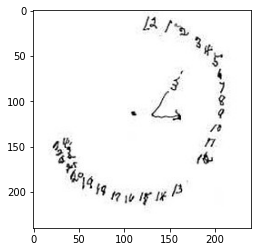

In [ ]:
plt.imshow(imread(para_cell))

In [ ]:
os.listdir(train_path+'uninfected')[0]

In [ ]:
uninfected_cell = train_path+'/uninfected/'+'C87P48ThinF_IMG_20150820_132327_cell_85.png'
plt.imshow(imread(uninfected_cell))

Real life images may not be all of same size. So lets make them of same size

In [ ]:
dim1 = []
dim2 = []
i = 0
for image_filename in os.listdir(test_path + 'healthy'):
  if(i != 0):
    img = imread(test_path + '/healthy/' + image_filename)
    # print(img.shape)
    d1, d2,color = img.shape
    dim1.append(d1)
    dim2.append(d2)
  i = i + 1

In [ ]:
dim1 

[240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240]

In [ ]:
dim2

[240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240]

In [ ]:
np.mean(dim1)

In [ ]:
np.mean(dim2) 

In [ ]:
image_shape = (240, 240, 3)

Now we'll later use this image_size to reshape our image. Now lets focus on improving our image, like flipping it, rotating it so that a model is able to understand a 'cell' in a better way

In [ ]:
130*130*3

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
imread(para_cell).max()

255

In [ ]:
# Choose carefully here we have  acell thus makes sense to use rotation, wont make sense if we had to detect a face
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,                             
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True,
                               fill_mode = 'nearest'
                               ) # rescale = 1/255, but in our case it already b/w 0-1

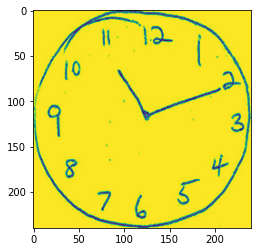

In [ ]:
para_image = imread(para_cell)
plt.imshow(para_image)

In [ ]:
# Modified image
plt.imshow(image_gen.random_transform(para_image))

AxisError: ignored

In [ ]:
image_gen.flow_from_directory(train_path)

Found 72 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 33 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten

In [ ]:
model = Sequential()

# 1 
model.add(Conv2D(filters=32, kernel_size=(3, 3), 
                 input_shape = image_shape, # Resize all image to same size
                 activation = 'relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

# 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 input_shape = image_shape, # Resize all image to same size
                 activation = 'relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

# 3
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 input_shape = image_shape, # Resize all image to same size
                 activation = 'relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

As our data is too large and image size is also too large we create batches

In [ ]:
batch_size = 32


In [ ]:
train_image_gen =  image_gen.flow_from_directory(train_path,
                                                 target_size = image_shape[:2],
                                                 color_mode= 'rgb',
                                                 batch_size = batch_size,
                                                 class_mode = 'binary') # casue binary classification

Found 72 images belonging to 2 classes.


In [ ]:
test_image_gen =  image_gen.flow_from_directory(test_path,
                                                 target_size = image_shape[:2],
                                                 color_mode= 'rgb',
                                                 batch_size = batch_size,
                                                 class_mode = 'binary',
                                                shuffle = False)


Found 33 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'healthy': 0, 'unhealthy': 1}

In [ ]:

results = model.fit_generator(train_image_gen, epochs = 20, 
                              validation_data = test_image_gen,
                              callbacks = [early_stop])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
3/3 [==============================] - 3s 1s/step - loss: 0.6750 - accuracy: 0.5278 - val_loss: 0.7082 - val_accuracy: 0.5455
Epoch 2/20
3/3 [==============================] - 2s 585ms/step - loss: 0.6778 - accuracy: 0.5417 - val_loss: 0.7309 - val_accuracy: 0.5455
Epoch 3/20
3/3 [==============================] - 2s 597ms/step - loss: 0.6731 - accuracy: 0.5278 - val_loss: 0.6971 - val_accuracy: 0.5455
Epoch 4/20
3/3 [==============================] - 2s 589ms/step - loss: 0.6756 - accuracy: 0.5139 - val_loss: 0.6879 - val_accuracy: 0.5758
Epoch 5/20
3/3 [==============================] - 2s 598ms/step - loss: 0.6705 - accuracy: 0.5417 - val_loss: 0.7210 - val_accuracy: 0.5152
Epoch 6/20
3/3 [==============================] - 2s 585ms/step - loss: 0.6747 - accuracy: 0.5278 - val_loss: 0.7191 - val_accuracy: 0.5455


In [ ]:
model.save("/content/drive/My Drive/alzheimer_classification/new_model.h5" )

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model("/content/drive/My Drive/alzheimer_classification/new_model.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [ ]:
model.evaluate(test_image_gen)

3/3 [==============================] - 1s 128ms/step - loss: 0.6403 - accuracy: 0.6061


[0.6403337121009827, 0.6060606241226196]

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
preds = model.predict_generator(test_image_gen, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3/3 [==============================] - 1s 146ms/step


In [ ]:
predictions = preds > 0.5
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_true = test_image_gen.classes

In [ ]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70        16
           1       1.00      0.18      0.30        17

    accuracy                           0.58        33
   macro avg       0.77      0.59      0.50        33
weighted avg       0.77      0.58      0.49        33



Personal Images

In [ ]:
para_cell

'/content/drive/My Drive/alzheimer_classification/training//unhealthy/uhealthy_16.jpeg'

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
my_image = image.load_img(para_cell,
               target_size = (240, 240))

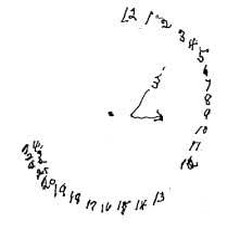

In [ ]:
my_image

In [ ]:
my_image_array = image.img_to_array(my_image)

In [ ]:
my_image_array.shape # We want (1, 130, 130, 3)

(240, 240, 3)

In [ ]:
my_image_array = np.expand_dims(my_image_array, axis = 0)

In [ ]:
my_image_array.shape

(1, 240, 240, 3)

In [ ]:
if(model.predict(my_image_array)[0][0] > 0.5):
  print("Unhealthy")
else:
  print("healthy")

NameError: ignored

In [ ]:
classes = np.argmax(predictions, axis = 1)

In [ ]:
print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
